# Twisted Bilayer Graphene

In this notebook, we will try to model a system of bilayer graphene.

In [1]:
!pip install sisl

In [0]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
import cmath
from google.colab import files
import sisl
from sisl import *
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline 

# AA stacking

We will start with the simplest model, AA stacking. 

Geometry{na: 4, no: 4,
 Atoms{species: 1,
  Atom{C, Z: 6, mass(au): 12.01070, maxR: 1.43420,
   Orbital{R: 1.43420, q0: 0.0}
  }: 4,
 },
 maxR: 1.43420,
 SuperCell{volume: 1.4878e+02, nsc: [3 3 1]}
}
[[ 0.    0.    0.  ]
 [ 1.42  0.    0.  ]
 [ 0.    0.   14.2 ]
 [ 1.42  0.   14.2 ]]


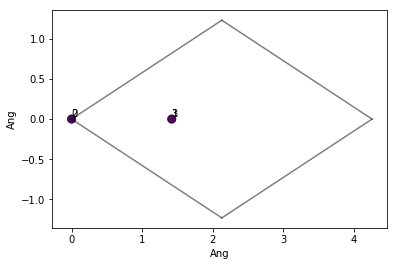

In [3]:
aa = sisl.geom.graphene().tile(1,0).tile(2,2)

#gnr.tile(reps = 20,axis=1)

print(aa)

plot(aa,atom_indices= True)

print(aa.xyz)


#separating the coordinates into arrays so that we can 3D plot them 

xarray = aa.xyz[:,0]

yarray = aa.xyz[:,1]

zarray = aa.xyz[:,2]




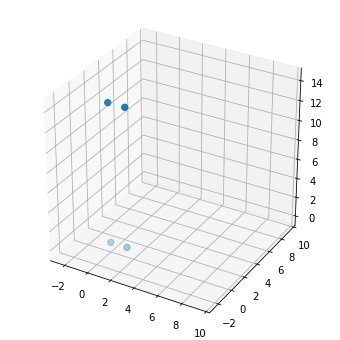

In [4]:
#now we want to plot our grid in 3D

#the scatter plot below shows the positions of the two layers of graphene

fig = plt.figure(figsize= (10,6))
ax = plt.axes(projection='3d')

ax.scatter3D(xarray, yarray, zarray, s = 40)
plt.xlim(-3, 10)
plt.ylim(-3, 10)

plt.gca().set_aspect('equal', adjustable='box') 
plt.draw()

 ## TEST 1

In [5]:
#calculation the band structure of bilayer graphene

#we first construct a blank canvas for the Hamiltonian

H = Hamiltonian(aa)

#now we need to set its values 

#we loop the Hamiltonian


"""  
  np.where(H.geom.xyz[idx[2],2] == H.geom.xyz[ia,2], H[io,idx[2]] ,H[io,idx[2]] = -0.4)""" 

#we want the loop to IGNORE the atoms in the same layer

for ia in aa:
  idx, xyz = aa.close(ia, R = [0.1, 1.43, 14.2], ret_xyz = True)
  
  H[ia,idx[0]] = 0
  H[ia,idx[1]] = -2.7
  
  
  #i dont know how I would implement this info
  #print(type(idx[2]))
  print(xyz[2][:,2])
  
  
  for i in range(len(idx[2])):
    
    if xyz[2][i,2] != aa.xyz[ia,2]:
      H[ia,idx[2][i]] = -0.4

  

  
    
print(H)

    
    

[14.2  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0. ]
[14.2  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0. ]
[ 0.  14.2 14.2 14.2 14.2 14.2 14.2 14.2 14.2 14.2 14.2 14.2 14.2 14.2
 14.2]
[ 0.  14.2 14.2 14.2 14.2 14.2 14.2 14.2 14.2 14.2 14.2 14.2 14.2 14.2
 14.2]
Hamiltonian{non-zero: 20, orthogonal: True,
 Spin{unpolarized, kind=f},
 Geometry{na: 4, no: 4,
  Atoms{species: 1,
   Atom{C, Z: 6, mass(au): 12.01070, maxR: 1.43420,
    Orbital{R: 1.43420, q0: 0.0}
   }: 4,
  },
  maxR: 1.43420,
  SuperCell{volume: 1.4878e+02, nsc: [3 3 1]}
 }
}


## Links to examples in Hamiltonian loops

[Example 1](https://github.com/zerothi/sisl/blob/master/examples/ex_01.py)

[Tutorial 4](https://github.com/zerothi/ts-tbt-sisl-tutorial/blob/aeb5763b5199c45adebe0b9b4da41eb672b60032/TB_04/run.ipynb)

In [0]:
band = BandStructure(H, [[0, 0, 0], [0, 0.5, 0],
                         [1/3, 2/3, 0], [0, 0, 0]], 400,
                        [r'$\Gamma$', r'$M$',
                         r'$K$', r'$\Gamma$'])


eigs = band.eigh()

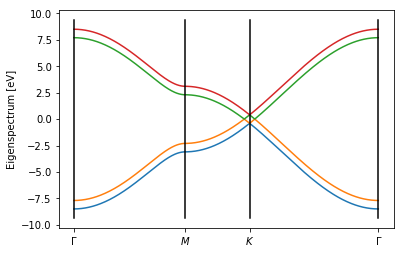

In [7]:
xtick, xtick_label = band.lineartick() #points where the band undergoes changes 
lk = band.lineark() 
plt.plot(lk, eigs)


plt.ylabel('Eigenspectrum [eV]')
plt.gca().xaxis.set_ticks(xtick)
plt.gca().set_xticklabels(xtick_label)

# Also plot x-major lines at the ticks
ymin, ymax = plt.gca().get_ylim()
for tick in xtick:
    plt.plot([tick,tick], [ymin,ymax], 'k')

## Different Method: Appending two layers

Now we will approach this system in a different way. In order to make the model valid for twisted bilayer graphene (at any angle), we can try a method that generates the Hamiltonian for both layers and afterwards appends them. 



In [8]:
#generating the 1st layer
#we will create a layer tiled 3 times in the y-direction and 3 in the x-direction

g1 = sisl.geom.graphene() #.tile(3,0).tile(3,1)

print(g1.na)


#generating the 2nd layer
#here we can choose the angle we want it rotated
#30 degrees is clearly seen in the 3D plot below
g2 = g1.rotate(angle = 0, v=[0,0,1]).move(v=[0,0,1.5])

#appending the geometry layers
gfinal = g1.add(g2) 

print(gfinal)

xarray = gfinal.xyz[:,0]

yarray = gfinal.xyz[:,1]

zarray = gfinal.xyz[:,2]

print(gfinal.xyz)




2
Geometry{na: 4, no: 4,
 Atoms{species: 1,
  Atom{C, Z: 6, mass(au): 12.01070, maxR: 1.43420,
   Orbital{R: 1.43420, q0: 0.0}
  }: 4,
 },
 maxR: 1.43420,
 SuperCell{volume: 7.4390e+01, nsc: [3 3 1]}
}
[[0.   0.   0.  ]
 [1.42 0.   0.  ]
 [0.   0.   1.5 ]
 [1.42 0.   1.5 ]]


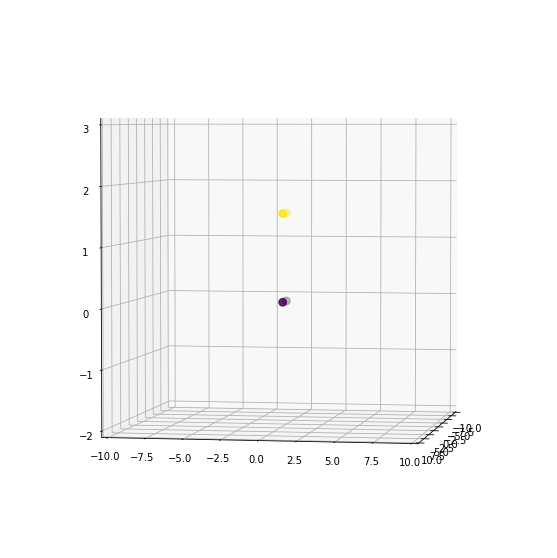

In [9]:
#now we want to plot our grid in 3D

#the scatter plot below shows the positions of the two layers of graphene

fig = plt.figure(figsize= (10,10))
ax = plt.axes(projection='3d')

ax.scatter3D(xarray, yarray, zarray, c = zarray, s = 60)
plt.xlim(-10, 10)
plt.ylim(-10, 10)


plt.gca().set_aspect('equal', adjustable='box') 
ax.view_init(elev=3, azim=10)
ax.set_zlim(-2,3)
        
plt.draw()

### Appending the Hamiltonians

In [10]:
#we can try generating the Hamiltonians separately and afterwards append them 

#Hamiltonian of the bottom layer NON TWISTED

"""H1 = Hamiltonian(g1)


for ia,io in H1:
  idx = H1.geom.close(ia, R = [0.1, 1.43])
  
  H1[io, idx[0]] = 0
  H1[io, idx[1]] = -2.7

H2 = Hamiltonian(g2)

for ia,io in H2:
  idx = H2.geom.close(ia, R = [0.1, 1.43])
  
  H2[io, idx[0]] = 0
  H2[io, idx[1]] = -2.7
  
print(H1)
print(H2)


Hfinal = H1.append(H2, axis = 0)"""

#this method doesn't work due to the appending of hamiltonians, we want to append the structures

#investigate the eps value
#the default eps value is 0.01
#it needs to be smaller than half the distance between neighbouring atoms 
#this is to avoid confusion selecting equivalent atoms


#THIS METHOD DOES NOT WORK. DONT TRY

'H1 = Hamiltonian(g1)\n\n\nfor ia,io in H1:\n  idx = H1.geom.close(ia, R = [0.1, 1.43])\n  \n  H1[io, idx[0]] = 0\n  H1[io, idx[1]] = -2.7\n\nH2 = Hamiltonian(g2)\n\nfor ia,io in H2:\n  idx = H2.geom.close(ia, R = [0.1, 1.43])\n  \n  H2[io, idx[0]] = 0\n  H2[io, idx[1]] = -2.7\n  \nprint(H1)\nprint(H2)\n\n\nHfinal = H1.append(H2, axis = 0)'

## Twisted Graphene Hamiltonian 

In order to calculate the Hamiltonian for a system with two layers of graphene, where the top layer is twisted at some angle (wrt to the bottom one). The total Hamiltonian of the system is the following: 

$$ H = H_1 + H_2 + H_{int} $$

$ H_1 $ refers to the Hamiltonian of the bottom layer, $ H_2 $ refers to the Hamiltonian of the top layer, and $H_{int} = \gamma_{int}e^{(r_{ij} - d)\beta}$ is the interaction Hamiltonian between the two layers, where $d$ is the interlayer separation and $\beta = 3$ and $\gamma_1 = 0.39 $ are constants. $\gamma_1$ is the interlayer nearest neighbour hopping integral. $ r_{ij}$ is the distance between atom i in the top layer and atom j in the bottom one. The value of $\beta$ reproduces perfectly the bands calculated with DFT. 

We will consider $r_{ij}$ and $d$ scalars. By choosing this interaction Hamiltonian, we are taking into account that the unit cell is complex and that the distances between atoms are all different. 

We let every atom in the top layers interact with the atoms in the bottom layer within a radius of $3a_0$.

For this, we can utilize Pythagoras Theorem and find that the sphere's radius needs to be 1.85 in order for the H.geom.close function to include all the necessary atom within the desired radius but in the other layer. 

## TEST 2

In [11]:
#we re going to try an alternative approach to the .close loop
#using the idx module, we can select what atoms the close function is considering
#1.85
print(g1)
print(g2)

array1 = np.arange(18)
array2 = np.arange(19,36)

Hfinal = Hamiltonian (gfinal)
for ia,io in Hfinal:
  idx, xyz, rij = Hfinal.geom.close(ia, R = [0.1, 1.43], ret_xyz = True, ret_rij = True)
  
  Hfinal[io, idx[0]] = 0
  Hfinal[io, idx[1]] = -2.7

  
#creating a close loop that connects the atoms of the bottom layer and only considers the top layer
for array1,ia in Hfinal:
 
  idx, xyz, rij = Hfinal.geom.close(array1, idx = array2, R = [2.85], ret_xyz = True, ret_rij = True)
  
  print(rij)
  
  idxlist = []
  
  
  for i in str(idx[0]):
	  idxlist.append(i)  
      
  
  for i in range(len(idxlist)):
    
    Hfinal[ia,idxlist[i]] = 0.39 * np.exp((rij[i] - 1)*3)
        
#THIS DOES NOT OUTPUT THE CORRECT RESULT    

  

print(Hfinal)


Geometry{na: 2, no: 2,
 Atoms{species: 1,
  Atom{C, Z: 6, mass(au): 12.01070, maxR: 1.43420,
   Orbital{R: 1.43420, q0: 0.0}
  }: 2,
 },
 maxR: 1.43420,
 SuperCell{volume: 7.4390e+01, nsc: [3 3 1]}
}
Geometry{na: 2, no: 2,
 Atoms{species: 1,
  Atom{C, Z: 6, mass(au): 12.01070, maxR: 1.43420,
   Orbital{R: 1.43420, q0: 0.0}
  }: 2,
 },
 maxR: 1.43420,
 SuperCell{volume: 7.4390e+01, nsc: [3 3 1]}
}
[2.06552657 2.45951215 2.45951215 2.84       2.45951215 2.45951215
 1.42       2.06552657 2.45951215 1.42       2.06552657 0.
 1.42       1.5        2.06552657 2.45951215 2.84       2.45951215
 1.42       2.06552657 0.         1.42       1.5        2.06552657
 2.45951215 2.06552657 0.         1.42       1.5        2.06552657
 2.45951215 0.         1.42       1.5        2.06552657 2.45951215
 2.84       2.45951215 2.06552657 2.45951215 2.45951215]
[1.42       2.45951215 2.06552657 2.84       2.45951215 1.42
 2.45951215 2.06552657 2.84       2.45951215 2.45951215 1.42
 0.         2.06552657 1.5 

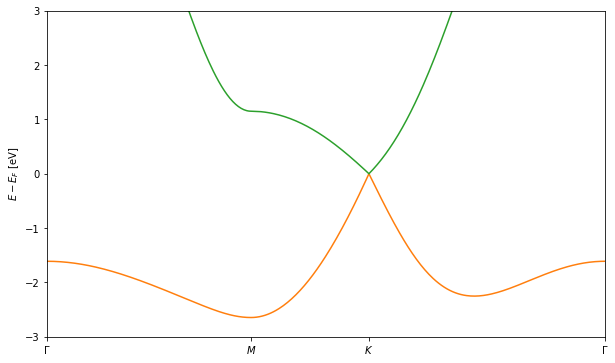

In [12]:
band = BandStructure(Hfinal, [[0, 0, 0], [0, 0.5, 0],
                         [1/3, 2/3, 0], [0, 0, 0]], 400,
                        [r'$\Gamma$', r'$M$',
                         r'$K$', r'$\Gamma$'])

bs = band.asarray().eigh()



lk, kt, kl = band.lineark(True)
plt.figure(figsize = (10,6))
plt.xticks(kt, kl)
plt.xlim(0, lk[-1])
plt.ylim([-3, 3])
plt.ylabel('$E-E_F$ [eV]')
for bk in bs.T:
    plt.plot(lk, bk)

## Moire Patterns


[Moire Pattern Demonstration](http://demonstrations.wolfram.com/MoirePatternsAndCommensurabilityInRotatedGrapheneBilayers/)

Twisted Bilayer Graphene (TBG) is engineered by stacking one graphene layer on top of another at a relative twist angle $\theta$, a procedure which produces a Moiré pattern superlattice potential.

It has recently been experimentally seen that a small relative twist between the layer induces an insulating and superconducting behaviour in the TBG. These behaviours have never been observed in a isolated single graphene sheet. 

It has been observed that TBG exhibits superconducting properties at the magic angle of $\theta = 1.05 °$. This translates into its low energy electronic bands becoming nearly flat at this angle.

Theorists proposed years ago that twisting two graphene layers would result in "Moiré bands" appearing. They arise due to the fact that the twist between layers modulates the tunneling carried out by electrons between the two layers in a periodic way.

The band width increases and decreases with the twist angle between the two layers, vanishing completely at some angles denominated "magic angles". The largest one corresponds to the already mentioned $\theta = 1.05 ° $ 

## Tagging atoms as A and B

(previous band part is unfinished)

Now we will try to tackle the problem in a different way, by tagging atoms (or layers)

## TEST 3

In [13]:
ab = sisl.geom.graphene()
print(ab.xyz)
print(ab.cell)

atoma = sisl.Atom('C', tag = 'A')
atomb = sisl.Atom('C', tag = 'B')
geo1 = sisl.Geometry([[0,0,0],[1.42,0,0]], atom = [atoma,atomb])

print(geo1)

#we can define a function that generates a graphene unit cell with the atom tagged

#z1 is the height of layer 1
#z2 is the height of layer 2
#we can define an angle of twist
#x,y,z is number of tiling in that axis
def graphunitcell(z1,z2,angle, x, y ,z):
  geo1 = sisl.Geometry([[0,0,z1], [1.42,0,z1]], atom = [atoma,atomb])
  
  geo1.cell[0,:] = [2.13,1.2297,0]
  geo1.cell[1,:]= [2.13,-1.2297,0]
  geo1.cell[2,:] = [0,0,14.2]
  
  geo1_fi = geo1.tile(x,0).tile(y,1).tile(z,2)
  
  if z2 != z1:
    geo2 = geo1_fi.rotate(angle = angle, v=[0,0,1]).move(v=[0,0,z2-z1]) 
    geofinal = geo1_fi.add(geo2)
    
    return geofinal
  else:
    return geo1
  
  
  
bilayergraphene = graphunitcell(0,1,0,3,3,3)


print(bilayergraphene.xyz)

xarray2 = bilayergraphene.xyz[:,0]

yarray2 = bilayergraphene.xyz[:,1]

zarray2 = bilayergraphene.xyz[:,2]



[[0.   0.   0.  ]
 [1.42 0.   0.  ]]
[[ 2.13        1.22975607  0.        ]
 [ 2.13       -1.22975607  0.        ]
 [ 0.          0.         14.2       ]]
Geometry{na: 2, no: 2,
 Atoms{species: 2,
  Atom{A, Z: 6, mass(au): 12.01070, maxR: -1.00000,
   Orbital{R: -1.00000, q0: 0.0}
  }: 1,
  Atom{B, Z: 6, mass(au): 12.01070, maxR: -1.00000,
   Orbital{R: -1.00000, q0: 0.0}
  }: 1,
 },
 maxR: -1.00000,
 SuperCell{volume: 2.8400e+02, nsc: [1 1 1]}
}
[[ 0.      0.      0.    ]
 [ 1.42    0.      0.    ]
 [ 2.13    1.2297  0.    ]
 [ 3.55    1.2297  0.    ]
 [ 4.26    2.4594  0.    ]
 [ 5.68    2.4594  0.    ]
 [ 2.13   -1.2297  0.    ]
 [ 3.55   -1.2297  0.    ]
 [ 4.26    0.      0.    ]
 [ 5.68    0.      0.    ]
 [ 6.39    1.2297  0.    ]
 [ 7.81    1.2297  0.    ]
 [ 4.26   -2.4594  0.    ]
 [ 5.68   -2.4594  0.    ]
 [ 6.39   -1.2297  0.    ]
 [ 7.81   -1.2297  0.    ]
 [ 8.52    0.      0.    ]
 [ 9.94    0.      0.    ]
 [ 0.      0.     14.2   ]
 [ 1.42    0.     14.2   ]
 [ 2.13  

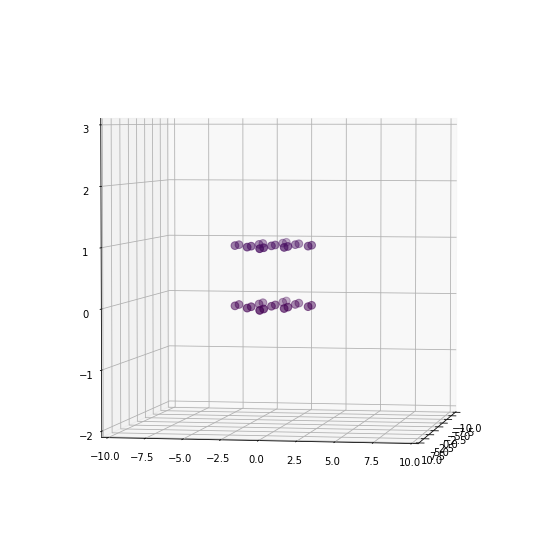

In [14]:
fig = plt.figure(figsize= (10,10))
ax = plt.axes(projection='3d')

ax.scatter3D(xarray2, yarray2, zarray2, c = zarray2, s = 60, )
plt.xlim(-10, 10)
plt.ylim(-10, 10)


plt.gca().set_aspect('equal', adjustable='box') 
ax.view_init(elev=3, azim=10)
ax.set_zlim(-2,3)
        
plt.show()

## Tagging atoms again

## TEST 4

In [15]:




#we can define a function that generates a graphene unit cell with the atom tagged

#z1 is the height of layer 1
#z2 is the height of layer 2
#we can define an angle of twist
#x,y,z is number of tiling in that axis
def graphunitcell(z1,z2,angle, x, y ,z):
  #creating a function that tags graphene
  g = sisl.geom.graphene()
  gtop = sisl.geom.graphene()

#the following way rewrites the atoms species because .atoms is a list of species not of atoms
  g.atoms[0] = sisl.Atom('C', tag = 'A')
  g.atoms[1] = sisl.Atom('C', tag = 'B')
  
  gtop.atoms[0] = sisl.Atom('C', tag = 'A2')
  gtop.atoms[1] = sisl.Atom('C', tag = 'B2')
  
  g1 = g.tile(x,0).tile(y,1).tile(z,2)
#making it bilayer 

  g2 = gtop.tile(x,0).tile(y,1).tile(z,2).rotate(angle = angle, v=[0,0,1]).move(v=[0,0,z2-z1])

  gfinal = g1.add(g2)
  
  if z2 != z1:
    
    return gfinal
  
  else:
    return g1

TBG = graphunitcell(0,2,0,1,1,1)

xarray2 = TBG.xyz[:,0]

yarray2 = TBG.xyz[:,1]

zarray2 = TBG.xyz[:,2]



print(TBG)

Geometry{na: 4, no: 4,
 Atoms{species: 5,
  Atom{C, Z: 6, mass(au): 12.01070, maxR: 1.43420,
   Orbital{R: 1.43420, q0: 0.0}
  }: 0,
  Atom{A, Z: 6, mass(au): 12.01070, maxR: -1.00000,
   Orbital{R: -1.00000, q0: 0.0}
  }: 1,
  Atom{B, Z: 6, mass(au): 12.01070, maxR: -1.00000,
   Orbital{R: -1.00000, q0: 0.0}
  }: 1,
  Atom{A2, Z: 6, mass(au): 12.01070, maxR: -1.00000,
   Orbital{R: -1.00000, q0: 0.0}
  }: 1,
  Atom{B2, Z: 6, mass(au): 12.01070, maxR: -1.00000,
   Orbital{R: -1.00000, q0: 0.0}
  }: 1,
 },
 maxR: 1.43420,
 SuperCell{volume: 7.4390e+01, nsc: [3 3 1]}
}


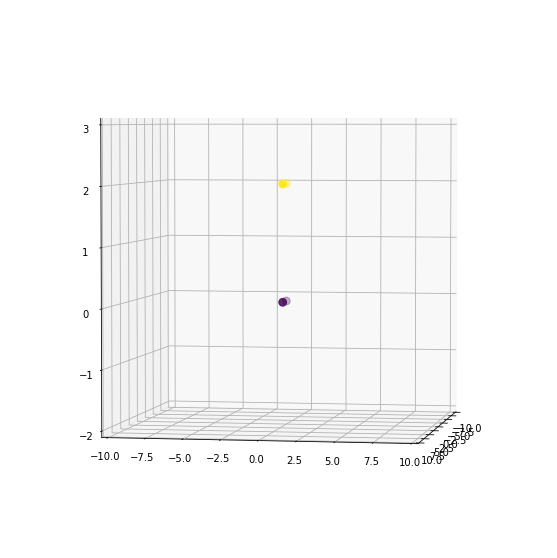

In [16]:
fig = plt.figure(figsize= (10,10))
ax = plt.axes(projection='3d')

ax.scatter3D(xarray2, yarray2, zarray2, c = zarray2, s = 60, )
plt.xlim(-10, 10)
plt.ylim(-10, 10)


plt.gca().set_aspect('equal', adjustable='box') 
ax.view_init(elev=3, azim=10)
ax.set_zlim(-2,3)
        
plt.show()


In [0]:
#initializing the Hamiltonian
#DIFFERENT APPROACH
#TRY THE EXPONENTIAL HOPPING INTEGRAL

Hg2 = Hamiltonian(TBG)

array1 = np.where(TBG.atom.specie == 1) #A
array2 = np.where(TBG.atom.specie == 2) #B
array3 = np.where(TBG.atom.specie == 3) #A'
array4 = np.where(TBG.atom.specie == 4) #B'


for ia,io in Hg2:
  idx, xyz, rij = Hg2.geom.close(ia, R = [0.1, 1.43], ret_xyz = True, ret_rij = True)
  
  Hg2[io, idx[0]] = 0
  Hg2[io, idx[1]] = -2.7
  
for array1,io in Hg2:
  
  index,xyz,rij = Hg2.geom.close(array1, idx = array2, R = [2.0], ret_xyz = True, ret_rij = True)
  
  
  for i in range(len(rij)):
    Hg2[array1,index[i]] = 0.04 * np.exp((rij[i] - 1)*3)
    
for array3,io in Hg2:
  
  index,xyz,rij = Hg2.geom.close(array3, idx = array4, R = [2.0], ret_xyz = True, ret_rij = True)
  
  
  for i in range(len(rij)):
    Hg2[array3,index[i]] = 0.04 * np.exp((rij[i] - 1)*3)



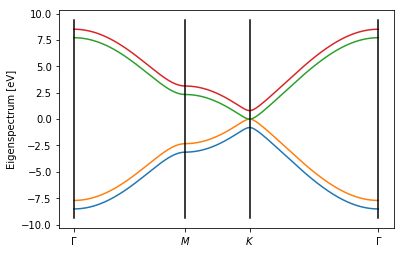

In [18]:
band = BandStructure(Hg2, [[0, 0, 0], [0, 0.5, 0],
                         [1/3, 2/3, 0], [0, 0, 0]], 400,
                        [r'$\Gamma$', r'$M$',
                         r'$K$', r'$\Gamma$'])

bs = band.asarray().eigh()



lk, kt, kl = band.lineark(True)
plt.figure(figsize = (10,6))
plt.xticks(kt, kl)
plt.xlim(0, lk[-1])
plt.ylim([-3, 3])
plt.ylabel('$E-E_F$ [eV]')
for bk in bs.T:
    plt.plot(lk, bk)

## TEST 5 

### Tagging atoms of a tiled system

Geometry{na: 108, no: 108,
 Atoms{species: 5,
  Atom{C, Z: 6, mass(au): 12.01070, maxR: 1.43420,
   Orbital{R: 1.43420, q0: 0.0}
  }: 0,
  Atom{A, Z: 6, mass(au): 12.01070, maxR: -1.00000,
   Orbital{R: -1.00000, q0: 0.0}
  }: 27,
  Atom{B, Z: 6, mass(au): 12.01070, maxR: -1.00000,
   Orbital{R: -1.00000, q0: 0.0}
  }: 27,
  Atom{A2, Z: 6, mass(au): 12.01070, maxR: -1.00000,
   Orbital{R: -1.00000, q0: 0.0}
  }: 27,
  Atom{B2, Z: 6, mass(au): 12.01070, maxR: -1.00000,
   Orbital{R: -1.00000, q0: 0.0}
  }: 27,
 },
 maxR: 1.43420,
 SuperCell{volume: 2.0085e+03, nsc: [3 3 1]}
}


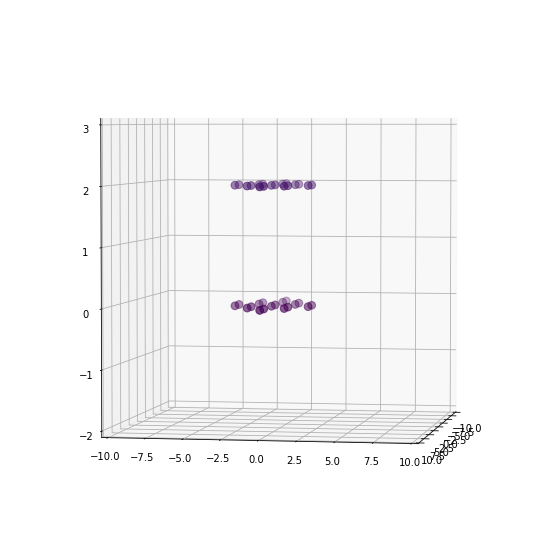

In [19]:
#using the function we designed 

TBG_tiled = graphunitcell(0,2,0,3,3,3)

print(TBG_tiled)

#plotting the structure

xarray_tiled = TBG_tiled.xyz[:,0]

yarray_tiled = TBG_tiled.xyz[:,1]

zarray_tiled = TBG_tiled.xyz[:,2]


fig = plt.figure(figsize= (10,10))
ax = plt.axes(projection='3d')

ax.scatter3D(xarray_tiled, yarray_tiled, zarray_tiled, c = zarray_tiled, s = 60, )
plt.xlim(-10, 10)
plt.ylim(-10, 10)


plt.gca().set_aspect('equal', adjustable='box') 
ax.view_init(elev=3, azim=10)
ax.set_zlim(-2,3)
        
plt.show()

In [32]:
Hg_tiled = Hamiltonian(TBG_tiled)

array1 = np.where(TBG_tiled.atom.specie == 1)
array2 = np.where(TBG_tiled.atom.specie == 2)
array3 = np.where(TBG_tiled.atom.specie == 3)
array4 = np.where(TBG_tiled.atom.specie == 4)


for ia,io in Hg_tiled:
  idx, xyz, rij = Hg_tiled.geom.close(ia, R = [0.1, 1.43], ret_xyz = True, ret_rij = True)
  
  Hg_tiled[io, idx[0]] = 0
  Hg_tiled[io, idx[1]] = -2.7
  
for array1,io in Hg_tiled:
  
  index,xyz,rij = Hg_tiled.geom.close(array1, idx = array2, R = [2.0], ret_xyz = True, ret_rij = True) 
  
  for i in range(len(rij)):
    Hg_tiled[array1,index[i]] = 0.039 * np.exp((rij[i] - 1)*3)
    
"""for array3,io in Hg_tiled:
  
  index,xyz,rij = Hg_tiled.geom.close(array3, idx = array4, R = [2.0], ret_xyz = True, ret_rij = True) 
  
  for i in range(len(rij)):
    Hg_tiled[array3,index[i]] = 0.039 * np.exp((rij[i] - 1)*3)"""
  
#if this last bit is added it looks like straight lines

'for array3,io in Hg_tiled:\n  \n  index,xyz,rij = Hg_tiled.geom.close(array3, idx = array4, R = [2.0], ret_xyz = True, ret_rij = True) \n  \n  for i in range(len(rij)):\n    Hg_tiled[array3,index[i]] = 0.039 * np.exp((rij[i] - 1)*3)'

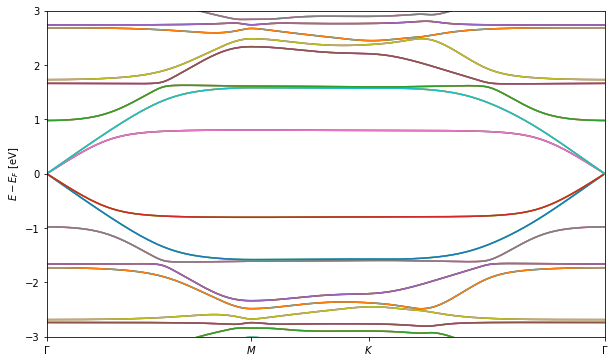

In [33]:
band = BandStructure(Hg_tiled, [[0, 0, 0], [0, 0.5, 0],
                         [1/3, 2/3, 0], [0, 0, 0]], 400,
                        [r'$\Gamma$', r'$M$',
                         r'$K$', r'$\Gamma$'])

bs = band.asarray().eigh()



lk, kt, kl = band.lineark(True)
plt.figure(figsize = (10,6))
plt.xticks(kt, kl)
plt.xlim(0, lk[-1])
plt.ylim([-3, 3])
plt.ylabel('$E-E_F$ [eV]')
for bk in bs.T:
    plt.plot(lk, bk)

### Model for the Hamiltonian of TBG

Describing the behaviour and therefore a model for Twisted Bilayer Graphene is extremely challenging, due to the unit cells in the Moiré pattern becoming infinitely large. We will use a model proposed by [Lin et al.](https://arxiv.org/pdf/1808.03634.pdf), this is a minimum tight-binding model with 3 parameters (inspired by MLG and untwisted BLG). 

They first consider a usual non-twisted bilayer graphene system. They propose that the interlayer hopping integral can be modified if one of the atom from one of the layers is displaced by some distance r. This can be corrected using the following equation

$$ t(r) = Ve^{-(\sqrt{r^2+d_0^2}-d_0)/\lambda}\frac{d_0^2}{r^2+d_0^2} $$

The values for all of these parameters are:

$$ a = 2.46$$ 
$$ d_0 = 3.35 $$
$$ V = 0.39 eV $$
$$ \lambda = 0.27 $$ 